### Install all the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls /content/drive/MyDrive/

'3. Completion Form_GwG.gdoc'        Screenshot_20230206-145943.png
 ACVassgn2/                         'Screenshot from 2022-11-27 17-21-34.png'
 ACVassgn3/                          search/
 articulo.pdf                        searchAgents.py
 brain.gsheet                       'Seeded Regions.gdoc'
'Colab Notebooks'/                   Spatial_assgn_6.gslides
 DLproject.zip                      'Spatial presentation.gslides'
 dmt_graphs.gsheet                  'spatial slides'/
 dmt_project/                       'TEST IMAGES'/
 expenses.gsheet                     thread.c
 Factorization_Machines.pdf          thread.h
'GPT Prompt for Website.gdoc'        trampoline.S
'Hackathon Videos'@                 'Untitled spreadsheet (1).gsheet'
'IMG_5493 (1).MOV'                  'Untitled spreadsheet.gsheet'
 mohit_part.mp4                      Video2.mat
'Mohit- Statement of Interest.pdf'   Video3.mat
 Resume22.gdoc                       Video4.mat
 Resume22.pdf


In [ ]:
cd /content/drive/MyDrive/Hackathon\ Videos

/content/drive/.shortcut-targets-by-id/18t9Oli7UBsq1M_AutQvS2SSqFVqS5tbF/Hackathon Videos


In [ ]:
ls

IMG_5489.MOV          Video1.MOV  Video4.MOV  Video7.mp4
IMG_5493.MOV          Video2.MOV  Video5.MOV  Video8.mp4
pose_landmarker.task  Video3.MOV  Video6.mp4


In [ ]:
!pip install mediapipe

In [ ]:
!pip install -q mediapipe==0.10.0
!pip install opencv-python

!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 27.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab.patches import cv2_imshow
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import cv2

### Pose estimation and tracking over videos

In [ ]:
import cv2
import mediapipe as mp
import os
videos_dir = "./"
video_files = ["IMG_5489.MOV"]

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
all_poses=[]
poses=[]
for video_file in video_files:
    video_path = os.path.join('./', video_file)

    # Open the preprocessed video file for reading
    cap = cv2.VideoCapture(video_path)

    # Process each frame in the video
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get the pose detection results
        results = pose.process(frame_rgb)

        # Check if pose landmarks are detected
        if results.pose_landmarks:
            # Extract the pose landmarks and store in an array
            pose_landmarks = []
            for landmark in results.pose_landmarks.landmark:
                pose_landmarks.append((landmark.x, landmark.y, landmark.z))

            # Append the pose landmarks to the array of all poses
            poses.append(pose_landmarks)
    all_poses.append(np.array(poses))
    # Release resources
    cap.release()
    # Save the detected poses array as a numpy file
    output_file = os.path.join("./", video_file[:-4]+"detected_poses.npy")
    # np.save(output_file, all_poses)

In [ ]:
def draw_landmarks_on_video(input_file, output_file):
    # Open the video file for reading
    cap = cv2.VideoCapture(input_file)

    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

    # Initialize a list to store the detection results
    base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
    VisionRunningMode = mp.tasks.vision.RunningMode
    options = vision.PoseLandmarkerOptions(
        base_options=base_options,
        min_pose_detection_confidence=0.7,
        min_tracking_confidence=0.8,
        min_pose_presence_confidence=0.7,
        output_segmentation_masks=True)
    detector = vision.PoseLandmarker.create_from_options(options)
    detection_results = []

    # Loop through the frames and detect poses
    frame_count = 0
    while True:
        print("frame", frame_count)
        # Read a frame from the video file
        ret, frame = cap.read()
        if not ret:
            break  # Break the loop if no frames are read or end of video
        # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        np_frame = np.copy(frame)
        mp_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

        # Perform pose detection on the frame
        # You need to replace this with your actual pose detection code
        detection_result = detector.detect(mp_frame)

        # Draw the pose landmarks on the frame
        pose_landmarks_list = detection_result.pose_landmarks
        annotated_frame = np.copy(np_frame)
        for idx in range(len(pose_landmarks_list)):
            pose_landmarks = pose_landmarks_list[idx]
            pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
            pose_landmarks_proto.landmark.extend([
                landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
            ])
            solutions.drawing_utils.draw_landmarks(
                annotated_frame,
                pose_landmarks_proto,
                solutions.pose.POSE_CONNECTIONS,
                solutions.drawing_styles.get_default_pose_landmarks_style())

        # Write the annotated frame to the video file
        out.write(annotated_frame)

        # Add the detection result to the list
        detection_results.append(detection_result)

        frame_count += 1

    # Release the VideoCapture and VideoWriter objects
    cap.release()
    out.release()

    return detection_results

### Visualizing Hand fluctuations

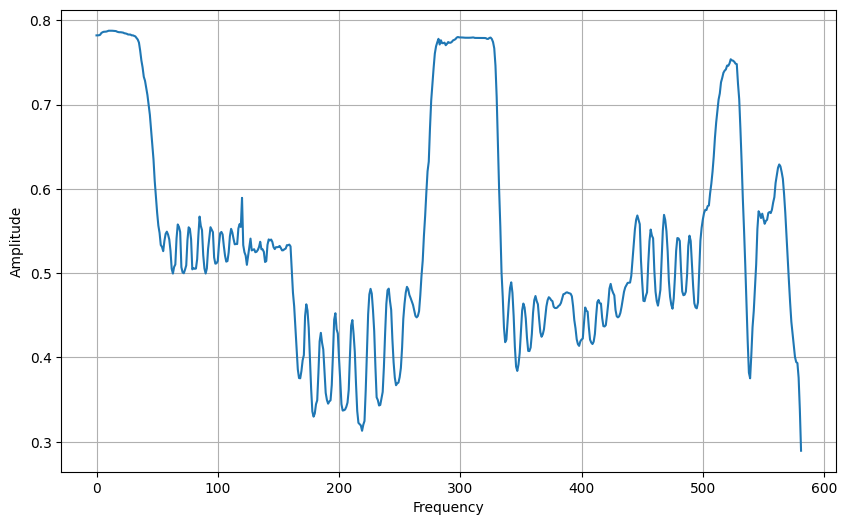

In [ ]:
import matplotlib.pyplot as plt
# Plot the Fourier transforms of the arrays
    # Plot the Fourier transform
plt.figure(figsize=(10, 6))
plt.plot(all_poses[0][:,15,1])
# plt.title("Fourier Transform of " + i)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

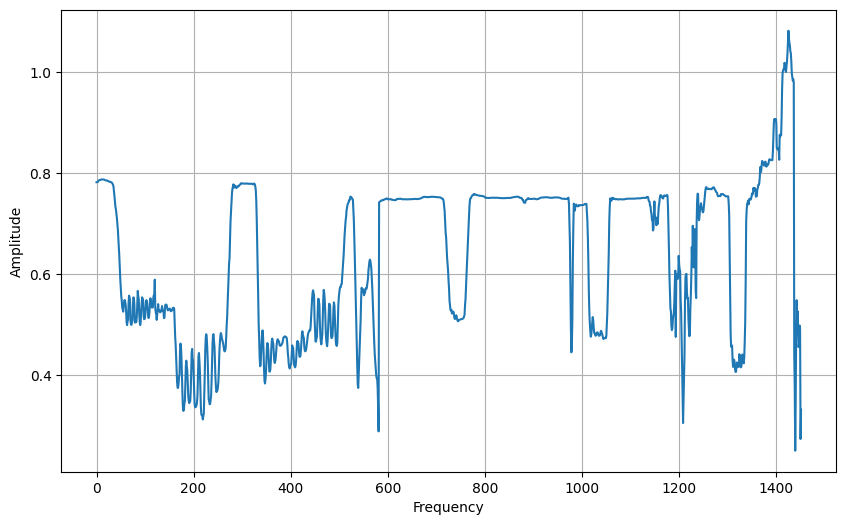

In [ ]:
import matplotlib.pyplot as plt
# Plot the Fourier transforms of the arrays
    # Plot the Fourier transform
plt.figure(figsize=(10, 6))
plt.plot(all_poses[1][:,15,1])
# plt.title("Fourier Transform of " + i)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Detecting number of Instances of Hand fluctuations over time.

In [ ]:
def detect_fluctuation(data):
    count = 0
    fluctuations = 0
    start_end_frames = []
    for i in range(1, len(data)):
        diff = abs(data[i] - data[i - 1])
        if 0.0006 < diff < 0.2: # sensitivity of where the position is.. CHANGE RANGE AS DESIRED BY THE DOCTOR OR DEFAULT LEARNING
            count += 1
            if count == 78: # we can adjust number of frames
                fluctuations += 1
                start_frame = i - count + 2
                end_frame = i + 1
                start_end_frames.append((start_frame, end_frame))
        else:
            count = 0
    return fluctuations, start_end_frames

Splicing video to hand-fluactuation time period and concatinating

In [ ]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import concatenate_videoclips, VideoFileClip

def splice_and_concatenate(video_file, time_frames, fps):
    clips = []
    for start_frame, end_frame in time_frames:
        start_time = start_frame / fps
        end_time = end_frame / fps
        clip = VideoFileClip(video_file).subclip(start_time, end_time)
        clips.append(clip)
    final_clip = concatenate_videoclips(clips)
    final_clip.write_videofile("output.mp4")

# Get the frames and fps from your video
cap = cv2.VideoCapture(in_path)
fps = cap.get(cv2.CAP_PROP_FPS)

fluctuations, start_end_frames = detect_fluctuation(np.array(poses)[:,15,1])
splice_and_concatenate(in_path, start_end_frames, fps)

In [ ]:
detect_fluctuation(all_poses[0][:,15,1])

4

In [ ]:
detect_fluctuation(all_poses[1][:,15,1])

11

In [ ]:
ls

IMG_5489.MOV          Video1.MOV  Video4.MOV  Video7.mp4
IMG_5493.MOV          Video2.MOV  Video5.MOV  Video8.mp4
pose_landmarker.task  Video3.MOV  Video6.mp4


In [ ]:
path="/content/drive/MyDrive/Hackathon Videos/IMG_5493.MOV"

In [ ]:
draw_landmarks_on_video(path, "/content/output.mp4")

frame 0
frame 1
frame 2
frame 3
frame 4
frame 5
frame 6
frame 7
frame 8
frame 9
frame 10
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
frame 20
frame 21
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
frame 31
frame 32
frame 33
frame 34
frame 35
frame 36
frame 37
frame 38
frame 39
frame 40
frame 41
frame 42
frame 43
frame 44
frame 45
frame 46
frame 47
frame 48
frame 49
frame 50
frame 51
frame 52
frame 53
frame 54
frame 55
frame 56
frame 57
frame 58
frame 59
frame 60
frame 61
frame 62
frame 63
frame 64
frame 65
frame 66
frame 67
frame 68
frame 69
frame 70
frame 71
frame 72
frame 73
frame 74
frame 75
frame 76
frame 77
frame 78
frame 79
frame 80
frame 81
frame 82
frame 83
frame 84
frame 85
frame 86
frame 87
frame 88
frame 89
frame 90
frame 91
frame 92
frame 93
frame 94
frame 95
frame 96
frame 97
frame 98
frame 99
frame 100
frame 101
frame 102
frame 103
frame 104
frame 105
frame 106
frame 107
frame 108
frame 109
frame 110


[PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.43259918689727783, y=0.398084431886673, z=-0.9318865537643433, visibility=0.9998549222946167, presence=0.9994658827781677), NormalizedLandmark(x=0.4473716616630554, y=0.38475361466407776, z=-0.8932489156723022, visibility=0.9995278120040894, presence=0.9979434609413147), NormalizedLandmark(x=0.4559825658798218, y=0.384863018989563, z=-0.8939931392669678, visibility=0.9993748068809509, presence=0.9980170726776123), NormalizedLandmark(x=0.46842631697654724, y=0.3854791820049286, z=-0.8940737247467041, visibility=0.99950110912323, presence=0.9971410036087036), NormalizedLandmark(x=0.4151056408882141, y=0.38538384437561035, z=-0.8969940543174744, visibility=0.9997676014900208, presence=0.9979815483093262), NormalizedLandmark(x=0.4025346338748932, y=0.3861897587776184, z=-0.8979554176330566, visibility=0.9997988343238831, presence=0.9985892176628113), NormalizedLandmark(x=0.3928212821483612, y=0.38726362586021423, z=-0.8986464738